In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Let's model how heat distributes
TODO: 
[ ] calculate convergence and warn if parameters are non convergent
[ ] Use some other 

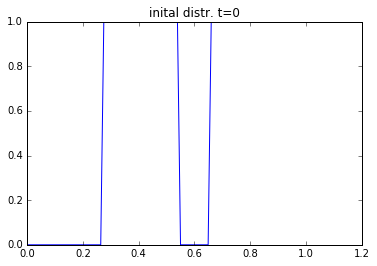

In [324]:

x_size = 100  # dim size
t_steps = 30   # time dim size
dx = 0.011
dt = 0.1
D =  0.03 #diff coef
# init func via Heaviside
U0 = np.zeros(x_size-1)
U0[x_size//4:] = 1.
U0[x_size//2:x_size//2+10]=0.

plt.plot(dx*np.arange(x_size-1),U0)
plt.title('inital distr. t=0')
plt.show()

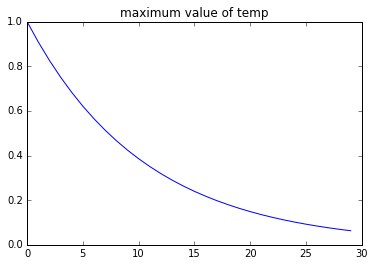

In [325]:
# init with U0
U_ti = U0
U = [U_ti]
maxs = [max(U_ti)]

for ti in range(1,t_steps):
    U_next = []
    U_ti = np.concatenate(([U_ti[-1]], U_ti, [U_ti[0]] ))    
    for xi in range(1,x_size):
        # pad torus-like
        # step!
        tt = dt/dx*(D*( U_ti[xi-1] - 2*U_ti[xi] +U_ti[xi+1] ) + dt*U_ti[xi] )
        U_next.append(tt)
    U_ti = np.array(U_next)
    maxs.append(max(U_ti))

    #print(max(U_ti),U_ti.shape)
    U.append(U_ti)
plt.plot(maxs)
plt.title('maximum value of temp')
    

In [326]:
U = np.array(U)
print(U)

[[0.         0.         0.         ... 1.         1.         1.        ]
 [0.27272727 0.         0.         ... 0.90909091 0.90909091 0.63636364]
 [0.27272727 0.07438017 0.         ... 0.82644628 0.75206612 0.55371901]
 ...
 [0.03438193 0.02709104 0.02043062 ... 0.05584707 0.04918665 0.04189576]
 [0.0313171  0.02480016 0.01882793 ... 0.05051542 0.04454319 0.03802625]
 [0.02852251 0.02269416 0.01733719 ... 0.04570222 0.04034525 0.0345169 ]]


(30, 99)


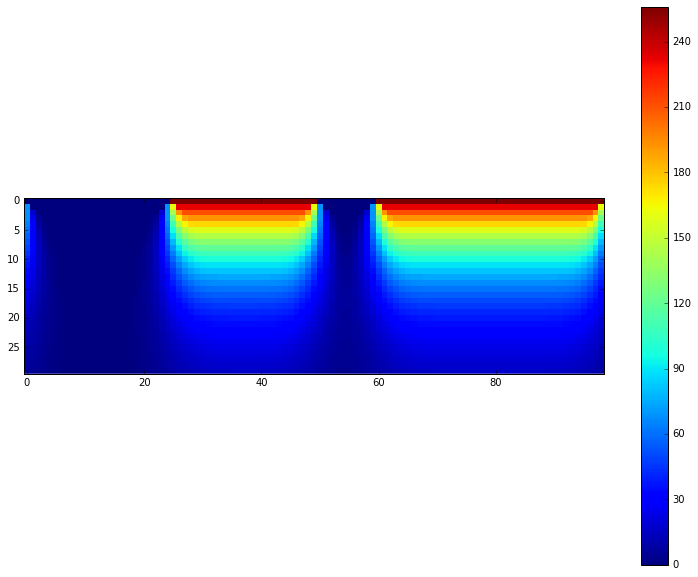

In [327]:
U=np.array(U*256)
print(U.shape)
f,ax = plt.subplots(1,1,figsize=(13,10))
ff = ax.imshow(U.astype(np.int),interpolation='none')
f.colorbar(ff,ax=ax)
